# Dataset Statistics 

-  See if there is any missing data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
import seaborn as sns

df = pd.read_csv("final.csv")

# See the null values in the dataset
print(df.isnull().sum())



ID                                  0
Country                             0
Latitude                            0
Longitude                           0
Name                                0
Year                                0
Participants                        0
Name War                            0
Winner                              0
Loser                             221
Lehmann Zhukov Scale             3640
Theatre                             0
Massacre                            0
Alternative Sources Consulted    4253
Description                         0
dtype: int64


In [20]:
df[df['Name War'] == "[]"]['ID']

Series([], Name: ID, dtype: object)

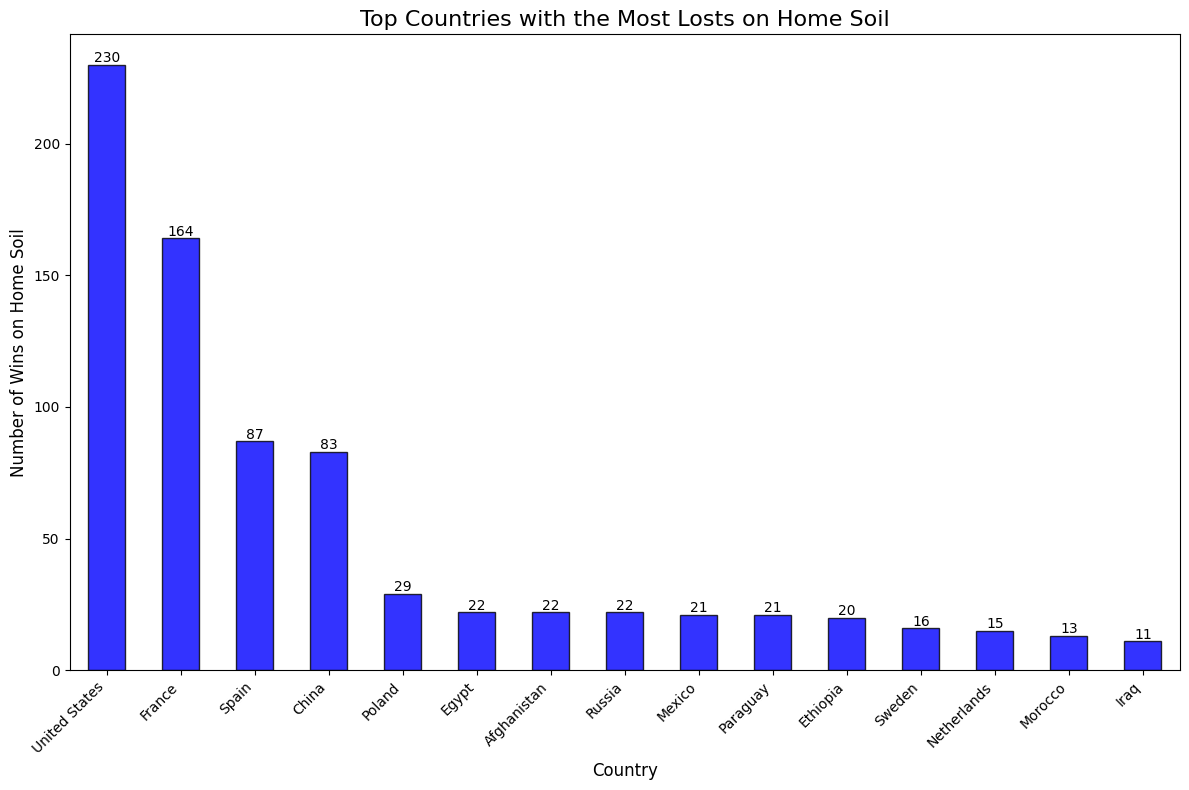

In [21]:
# Filter the data for battles where the country is the winner
home_wins = df[df['Country'] == df['Loser']]

# Count home wins by country
home_win_counts = home_wins['Country'].value_counts().head(15)

# Create a bar chart for the top countries with the most home wins
fig, ax = plt.subplots(figsize=(12, 8))
home_win_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.8, ax=ax)

# Add labels and title
ax.set_title("Top Countries with the Most Losts on Home Soil", fontsize=16)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Number of Wins on Home Soil", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add numbers on top of each bar
for i, v in enumerate(home_win_counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

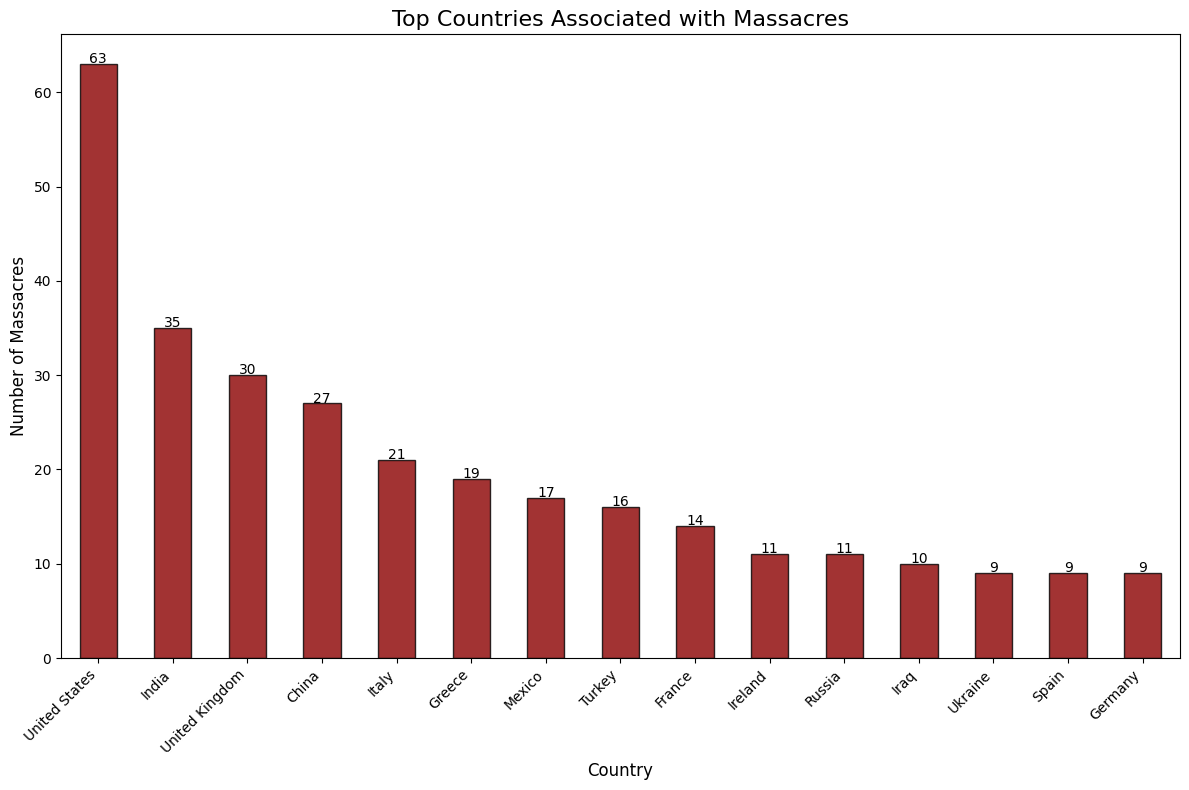

In [15]:
# Filter the data to include only rows where "Massacre" is not "No"
df_filtered = df[df['Massacre'] != "No"]

# Count massacres by country
massacre_counts = df_filtered['Country'].value_counts().head(15)

# Create a bar chart for the top countries
fig, ax = plt.subplots(figsize=(12, 8))
massacre_counts.plot(kind='bar', color='darkred', edgecolor='black', alpha=0.8, ax=ax)

# Add labels and title
ax.set_title("Top Countries Associated with Massacres", fontsize=16)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Number of Massacres", fontsize=12)
#ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(massacre_counts):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Top 15 Countries**

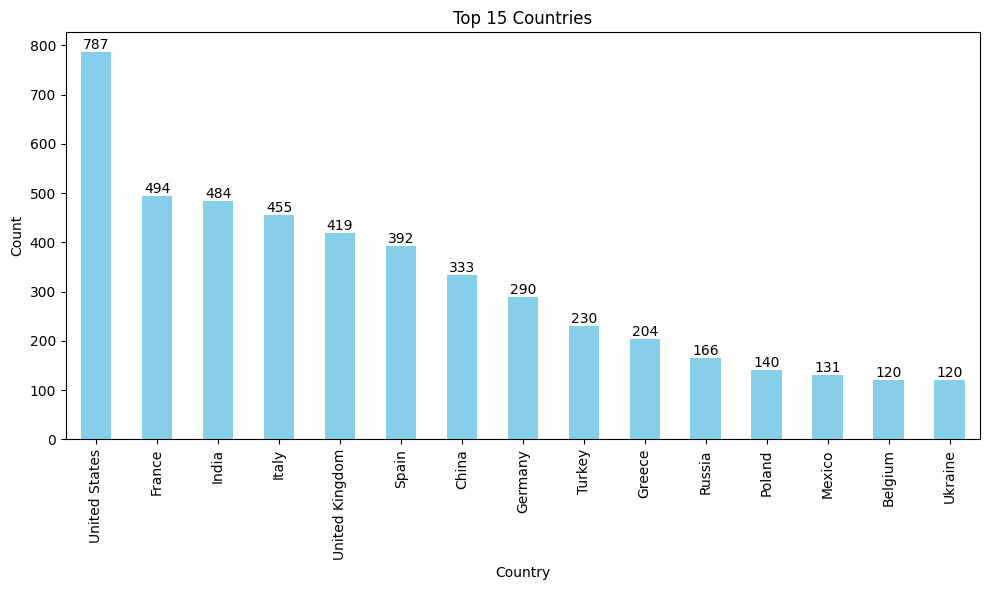

In [21]:
top_15_countries = df['Country'].value_counts().head(15)
plt.figure(figsize=(10, 6))
top_15_countries.plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

for i, count in enumerate(top_15_countries):
    plt.text(i, count, str(count), ha='center', va='bottom')



**Top 15 Battles**

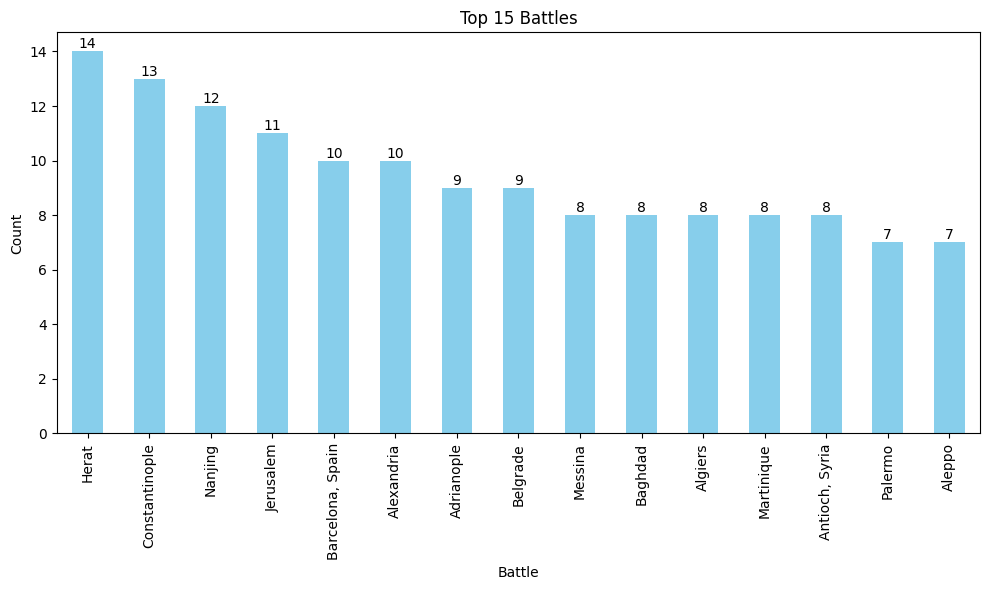

In [22]:
top_15_battles = df['Name'].value_counts().head(15)
plt.figure(figsize=(10, 6))
top_15_battles.plot(kind='bar', color='skyblue')
plt.title('Top 15 Battles')
plt.xlabel('Battle')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

for i, count in enumerate(top_15_battles):
    plt.text(i, count, str(count), ha='center', va='bottom')

**Top 15 Years**

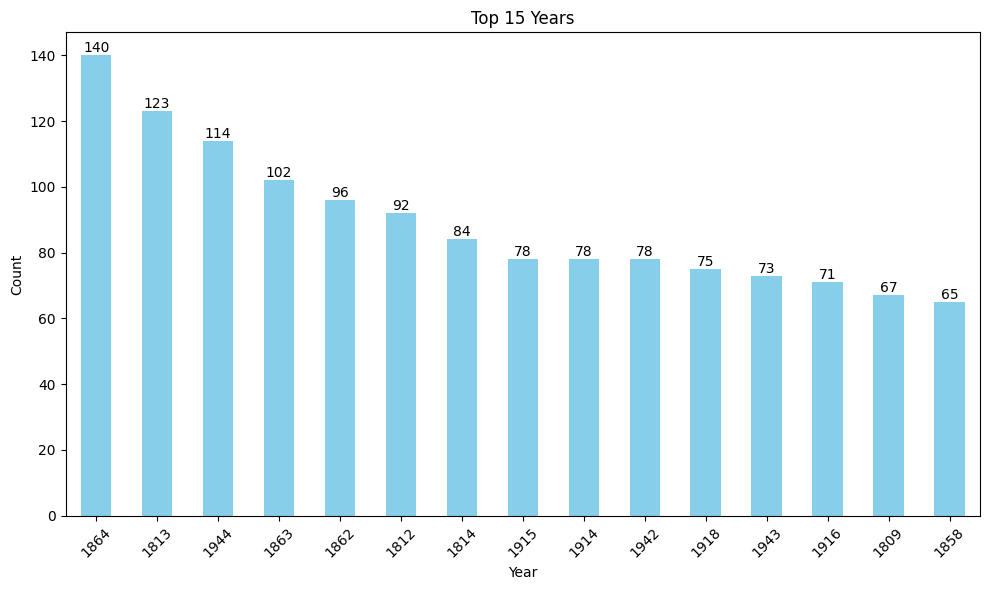

In [23]:
top_15_years = df['Year'].value_counts().head(15)
plt.figure(figsize=(10, 6))
top_15_years.plot(kind='bar', color='skyblue')
plt.title('Top 15 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

for i, count in enumerate(top_15_years):
    plt.text(i, count, str(count), ha='center', va='bottom')



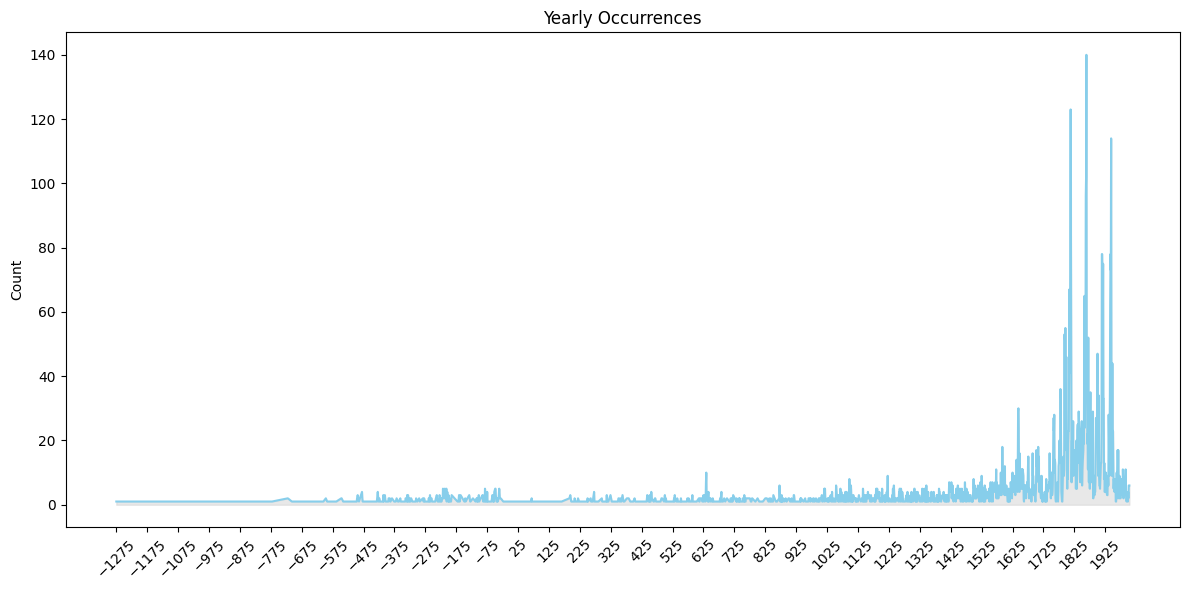

In [24]:
dfYear = pd.to_numeric(df['Year'], errors='coerce')
year_counts = dfYear.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, color='skyblue') 
plt.fill_between(year_counts.index, year_counts.values, color='lightgray', alpha=0.5)  
plt.title('Yearly Occurrences')
plt.xticks(ticks=range(int(year_counts.index.min()), int(year_counts.index.max()) + 1, 100), rotation=45)
plt.ylabel('Count')
plt.grid(False)  
plt.tight_layout()



**Top 15 Wars**

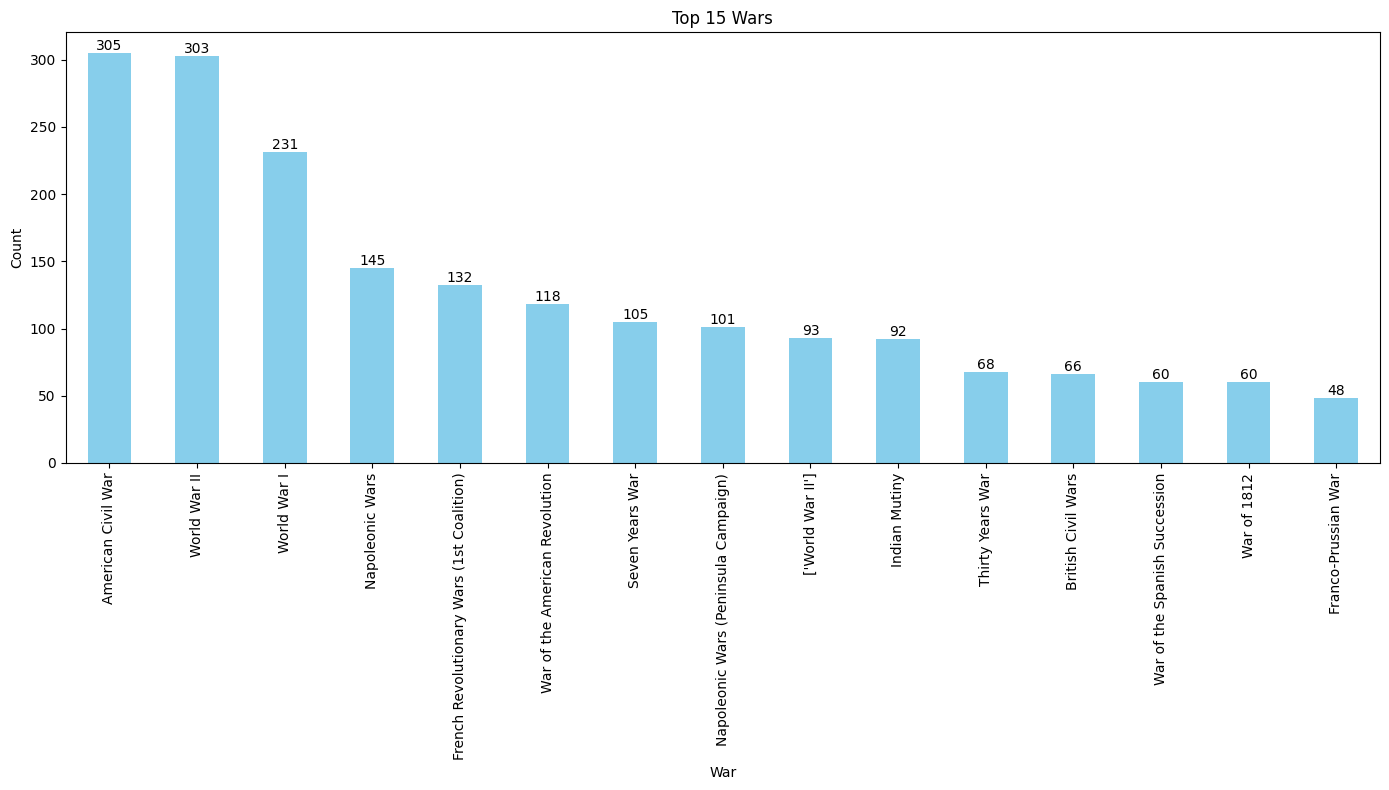

In [25]:
top_15_wars = df['Name War'].value_counts().head(15)
plt.figure(figsize=(14, 8))
top_15_wars.plot(kind='bar', color='skyblue')
plt.title('Top 15 Wars')
plt.xlabel('War')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

for i, count in enumerate(top_15_wars):
    plt.text(i, count, str(count), ha='center', va='bottom')


**Top 15 Winners**

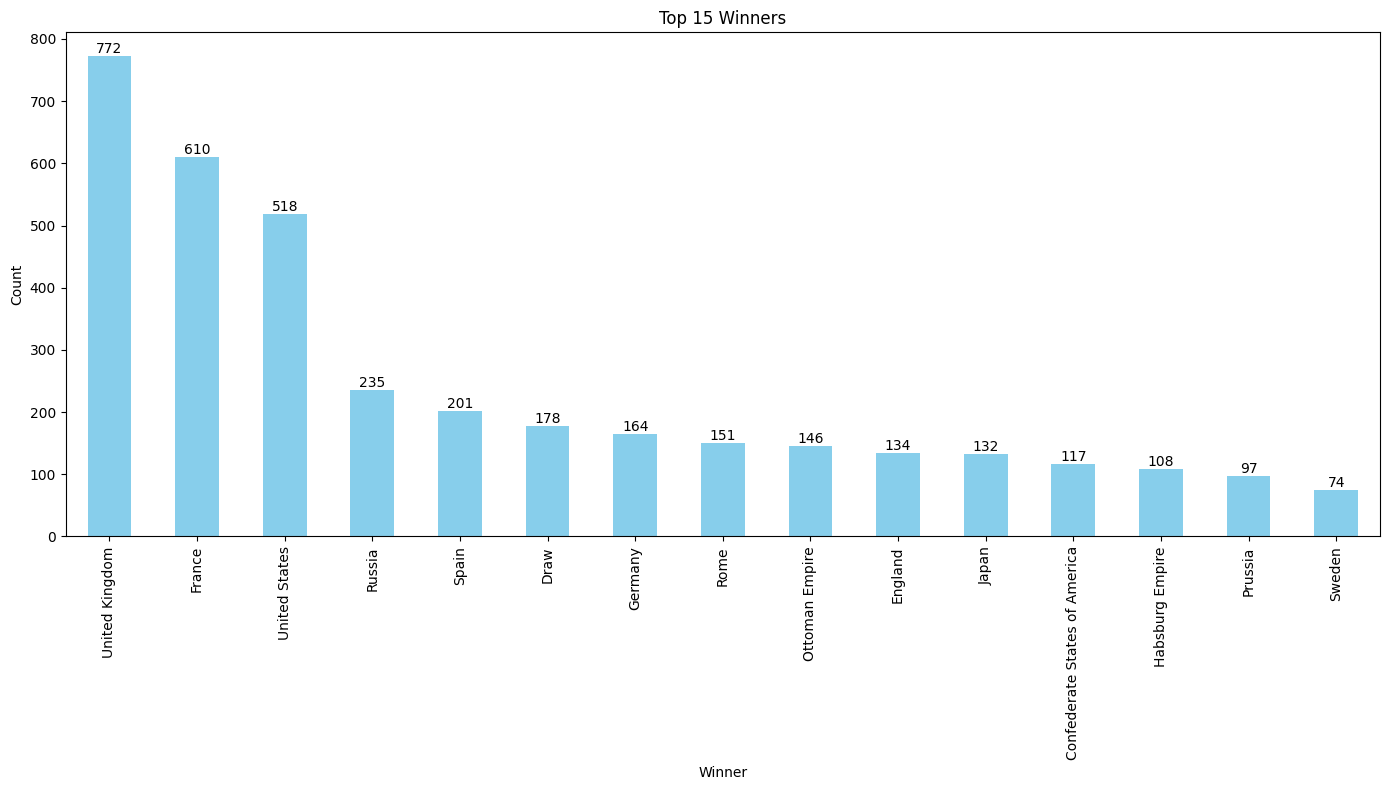

In [26]:
top_15_winners = df['Winner'].value_counts().head(15)
plt.figure(figsize=(14, 8))
top_15_winners.plot(kind='bar', color='skyblue')
plt.title('Top 15 Winners')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

for i, count in enumerate(top_15_winners):
    plt.text(i, count, str(count), ha='center', va='bottom')





**Top 15 Losers**

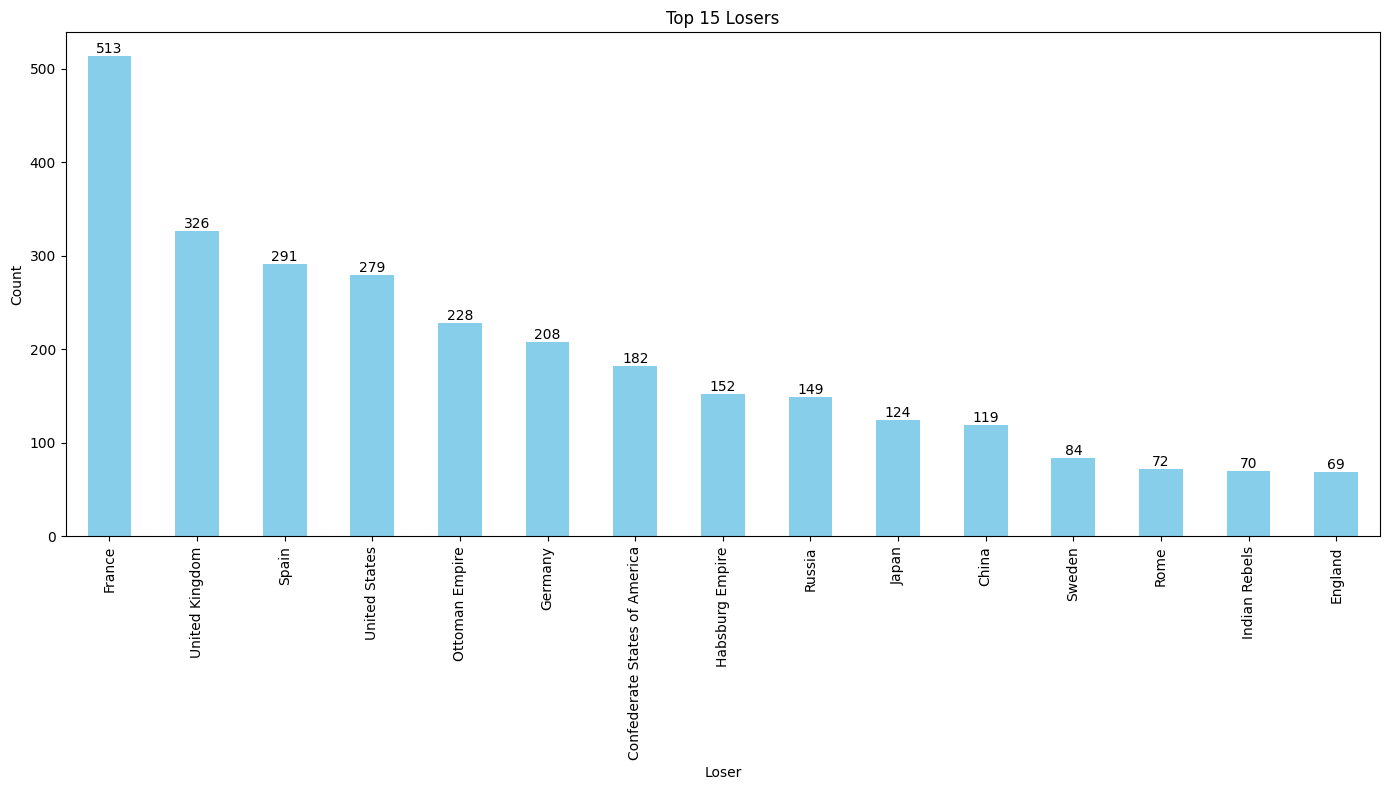

In [27]:
top_15_losers = df['Loser'].value_counts().head(15)
plt.figure(figsize=(14, 8))
top_15_losers.plot(kind='bar', color='skyblue')
plt.title('Top 15 Losers')
plt.xlabel('Loser')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

for i, count in enumerate(top_15_losers):
    plt.text(i, count, str(count), ha='center', va='bottom')

    

**Lehmann Zhukov Scale**

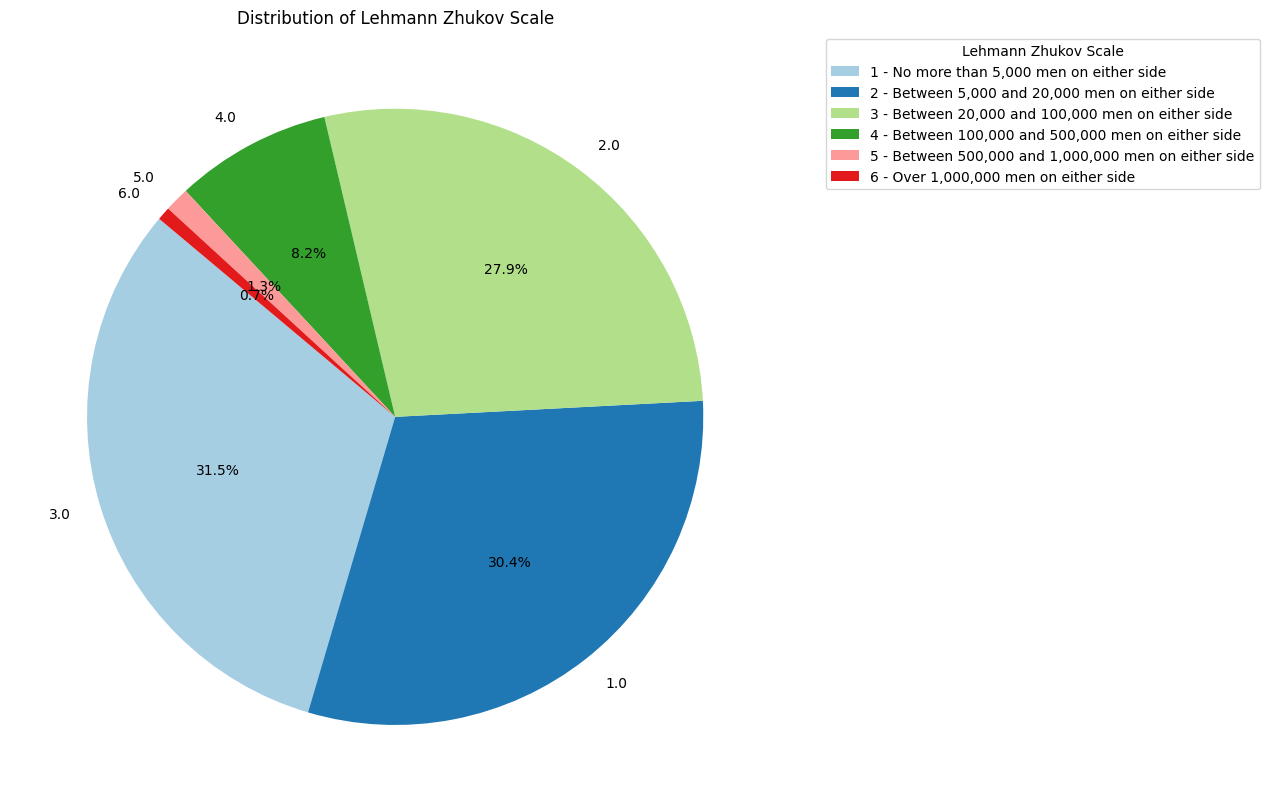

In [28]:
lz_scale_counts = df['Lehmann Zhukov Scale'].value_counts()

scale_descriptions = [
    "1 - No more than 5,000 men on either side",
    "2 - Between 5,000 and 20,000 men on either side",
    "3 - Between 20,000 and 100,000 men on either side",
    "4 - Between 100,000 and 500,000 men on either side",
    "5 - Between 500,000 and 1,000,000 men on either side",
    "6 - Over 1,000,000 men on either side"
]

plt.figure(figsize=(12, 10))
lz_scale_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Distribution of Lehmann Zhukov Scale')
plt.ylabel('')
plt.legend(scale_descriptions, title='Lehmann Zhukov Scale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



**Theatre**

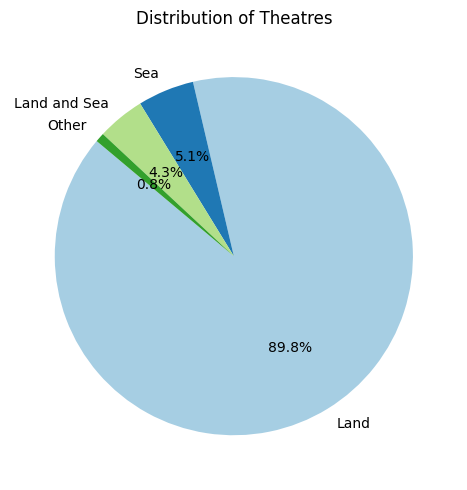

In [29]:
theatre_counts = df['Theatre'].value_counts()
top_3_theatres = theatre_counts.head(3)
other_count = theatre_counts.iloc[3:].sum()
top_3_theatres['Other'] = other_count

plt.figure(figsize=(5, 5))
top_3_theatres.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Distribution of Theatres')
plt.ylabel('')
plt.tight_layout()




**Massacre**

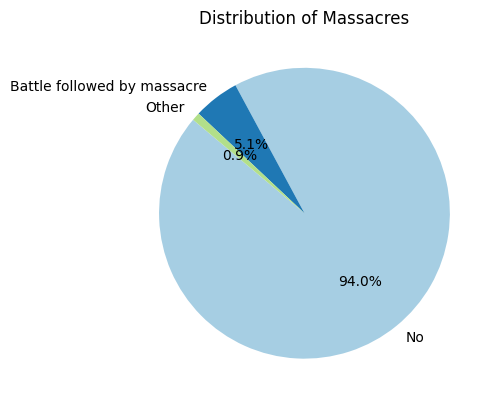

In [30]:
massacre_counts = df['Massacre'].value_counts()
top_2_massacres = massacre_counts.head(2)
other_count = massacre_counts.iloc[2:].sum()
top_2_massacres['Other'] = other_count

plt.figure(figsize=(5, 5))
top_2_massacres.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Distribution of Massacres')
plt.ylabel('')
plt.tight_layout()


**Top 15 Participants**

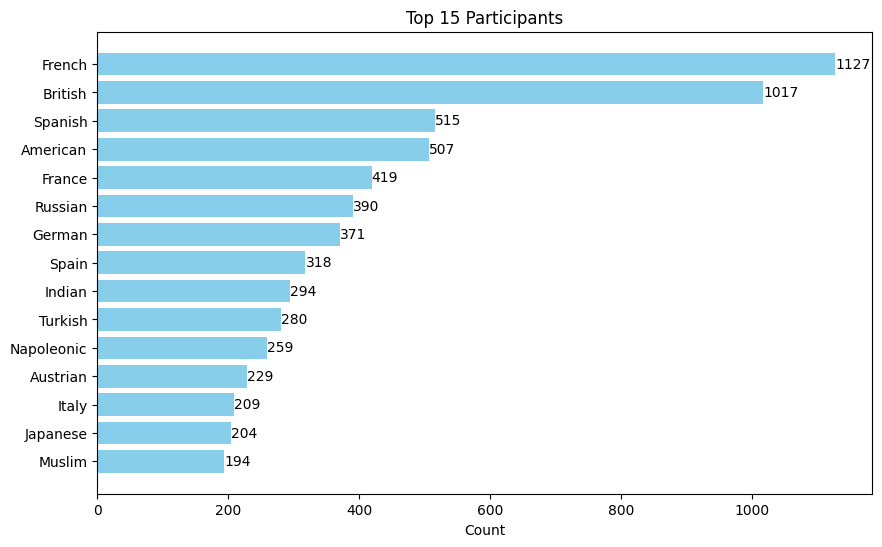

In [31]:
all_participants = []
for participants in df['Participants']:
    if isinstance(participants, str):
        # Convert string representation of list to actual list
        try:
            participants_list = ast.literal_eval(participants)
            if isinstance(participants_list, list):
                all_participants.extend(participants_list)
        except (ValueError, SyntaxError):
            continue

participant_counts = Counter(all_participants)

top15 = participant_counts.most_common(15)
participants, counts = zip(*top15)

plt.figure(figsize=(10, 6))
bars = plt.barh(participants, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top 15 Participants')
plt.gca().invert_yaxis() 

for bar, count in zip(bars, counts):
    plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center')


plt.show()



